In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls

# File to Load (Remember to change these)
import os
import csv

# Read the City and Ride Data
#C:\Users\ginaf\city_data.csv
city_data_to_load = "C:/Users/ginaf/city_data.csv"
city_data = pd.read_csv(city_data_to_load)
#city_data.head()

#C:\Users\ginaf\ride_data.csv
ride_data_to_load = "C:/Users/ginaf/ride_data.csv"
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()

In [2]:
# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


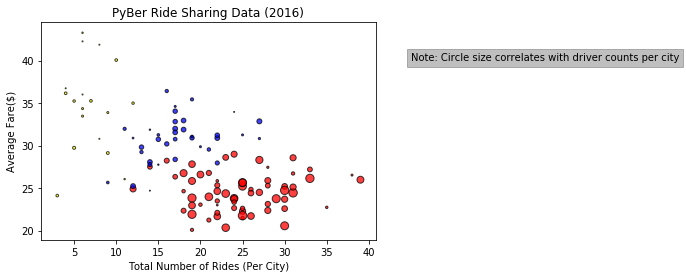

In [3]:
#so this is what I worked through with the tutor
urban_start= city_ride[city_ride['type']== "Urban"]
suburban_start=city_ride[city_ride['type']== "Suburban"]
rural_start= city_ride[city_ride['type']== "Rural"]

#urban_start
#total rides
u_rides=urban_start.groupby(['city']).count()['ride_id']
s_rides=suburban_start.groupby(['city']).count()['ride_id']
r_rides=rural_start.groupby(['city']).count()['ride_id']

#average fare
u_avg=urban_start.groupby(['city']).mean()['fare']
s_avg=suburban_start.groupby(['city']).mean()['fare']
r_avg=rural_start.groupby(['city']).mean()['fare']

#number of drivers
u_drivers=urban_start.groupby(['city']).mean()['driver_count']
s_drivers=suburban_start.groupby(['city']).mean()['driver_count']
r_drivers=rural_start.groupby(['city']).mean()['driver_count']

plt.scatter(u_rides, u_avg, marker="o", facecolors="red", edgecolors="black", s=u_drivers, alpha=0.75)
plt.scatter(s_rides, s_avg, marker="o", facecolors="blue", edgecolors="black", s=s_drivers, alpha=0.75)
plt.scatter(r_rides, r_avg, marker="o", facecolors="yellow", edgecolors="black", s=r_drivers, alpha=0.75)

plt.title("PyBer Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.text(45, 40, "Note: Circle size correlates with driver counts per city", bbox=dict(facecolor='black', alpha=0.25))
plt.show()

In [4]:
#And this is the insane amount of garbage I tried to do on my own with the internet for help (the internet sucks)
#I suck most of all
#bubble plot of ride sharing
# Obtain the x and y coordinates for each of the three city types
#x_avgfare = city_ride.groupby('fare')
#x_count=x_avgfare['fare'].count()

#driver count 
#driver=city_ride.groupby('driver_count')
#driver_count=driver['driver_count'].count()

#maker_group = used_car_df.groupby('maker')
# Count how many times each maker appears in our group
#count_makers = maker_group['maker'].count()
#count_makers
#count_chart = count_makers.plot(kind='bar')
# Set the xlabel and ylabel using class methods
#count_chart.set_xlabel("Car Manufacturer")
#count_chart.set_ylabel("Number of Cars")
#plt.show()

#type_group = city_ride.groupby('type')
#count_types = type_group['type'].count()
#types_chart = count_types.plot(kind='bar')
#suburban = city_ride["type", "fare"].value_counts()
#rural = city_ride["type", "fare"].value_counts()

# Build the scatter plots for each city types
#ride_shar = urban.add(suburban, fill_value=0)
#ride_sharing=ride_shar.add(rural, fill_value=0)

# Incorporate the other graph properties
#plt.scatter(x_count, count_types, marker="o", facecolors="red", edgecolors="black", s=driver_count, alpha=0.75)
#plt.ylim(0, x_count)
#plt.xlim(0, x_count)
#plt.show()
#plt.scatter(x,y,s=s)
#plotly_fig = tls.mpl_to_plotly(bubbles_mpl)
#py.iplot(plotly_fig, filename='mpl-bubbles')

# Set the xlabel and ylabel using class methods
#types_chart.set_xlabel("Type of City")
#types_chart.set_ylabel("Number of Rides")
#plt.show()

# Create a legend
#plt.title("PyBer Ride Sharing Data (2016)")
#plt.xlabel("Total Number of Rides Per City")
#plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
#text("Circle size correlates with driver counts per city", bbox=dict(facecolor='red', alpha=0.5))

# Save Figure
#plt.savefig("../Images/ride_sharing.png")

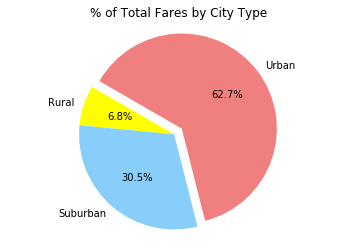

In [5]:
#total fares by city type
# Calculate Type Percents
type_rides=city_ride.groupby(['type']).sum()['fare']
total_rides=city_ride['fare'].sum()
fares= type_rides/total_rides*100 
colors=["yellow", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart
#again the shocking difference between someone who knows what the fuck they're doing... and me
#type_pie = city_ride.plot(kind="pie", y=fares, title=("% of Total Fares by " + city_type))
type_pie=plt.pie(fares, labels=["Rural", "Suburban", "Urban"], explode=explode, colors=colors, startangle=150, autopct="%1.1f%%")
#type_pie.set_ylabel("type")
#plt.tight_layout()
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
# Save Figure
#plt.savefig("../Images/type_pie.png")

In [6]:
 # Show Figure
#plt.show()

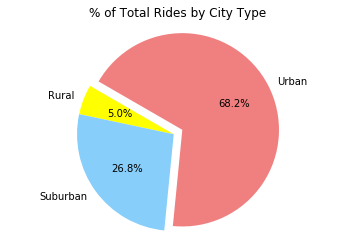

In [7]:
#total rides by city type
# Calculate Ride Percents
city_totals=city_ride.groupby(['type']).sum()['ride_id']
ride_totals=city_ride['ride_id'].sum()
rides= city_totals/ride_totals*100 
colors=["yellow", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart
type_pie=plt.pie(rides, labels=["Rural", "Suburban", "Urban"], explode=explode, colors=colors, startangle=150, autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Rides by City Type")         
plt.show()

# Save Figure
# Save Figure
#plt.savefig("../Images/ride_pie.png")

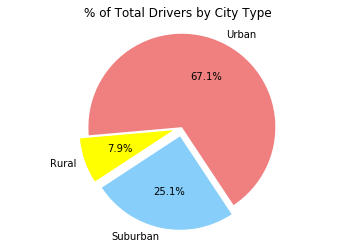

In [9]:
#total drivers by city type
# Calculate Driver Percents
city_driver=city_ride.groupby(['type']).mean()['driver_count']
driver_total=city_ride['driver_count'].mean()
drivers= city_driver/driver_total*100 
colors=["yellow", "lightskyblue", "lightcoral"]
explode = (0.1,0.1,0)

# Build Pie Charts
type_pie=plt.pie(drivers, labels=["Rural", "Suburban", "Urban"], explode=explode, colors=colors, startangle=185, autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure
# Save Figure
#plt.savefig("../Images/drive_pie.png")